# KVASIR Dataset (v2)

## Initial Setup

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
seed = 170081

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Download dataset and extract

In [11]:
!wget -nc "https://datasets.simula.no/kvasir/data/kvasir-dataset-v2.zip"

--2019-09-03 16:12:30--  https://datasets.simula.no/kvasir/data/kvasir-dataset-v2.zip
Resolving datasets.simula.no (datasets.simula.no)... 128.39.36.14
Connecting to datasets.simula.no (datasets.simula.no)|128.39.36.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2489312085 (2.3G) [application/zip]
Saving to: ‘kvasir-dataset-v2.zip’

kvasir-dataset-v2.z 100%[===================>]   2.32G  18.5MB/s    in 2m 11s  

2019-09-03 16:14:43 (18.1 MB/s) - ‘kvasir-dataset-v2.zip’ saved [2489312085/2489312085]



In [0]:
!unzip -nq "kvasir-dataset-v2" -d "dataset"

In [0]:
path = Path("dataset/kvasir-dataset-v2")

## Load Dataset into memory

In [0]:
data = ImageDataBunch.from_folder(path, 
                                  valid_pct=0.2, 
                                  seed=seed, 
                                  ds_tfms=get_transforms(flip_vert=True), 
                                  bs=32, 
                                  size=224
                                  ).normalize(imagenet_stats)

In [20]:
data.classes

['dyed-lifted-polyps',
 'dyed-resection-margins',
 'esophagitis',
 'normal-cecum',
 'normal-pylorus',
 'normal-z-line',
 'polyps',
 'ulcerative-colitis']

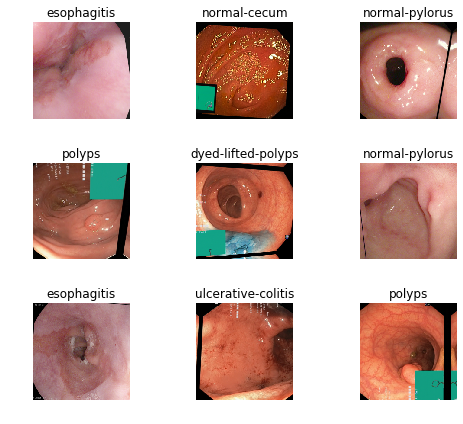

In [23]:
data.show_batch(rows=3,figsize=(7, 6))

## Train initial model using transfer learning

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [25]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.763782,0.435317,0.839375,05:01
1,0.504092,0.353863,0.848750,04:58
2,0.434434,0.303430,0.875625,05:02
3,0.371383,0.277100,0.888125,04:56
4,0.340499,0.264896,0.896250,04:54


In [0]:
learn.save("stage-1")

## Evaluate initial model

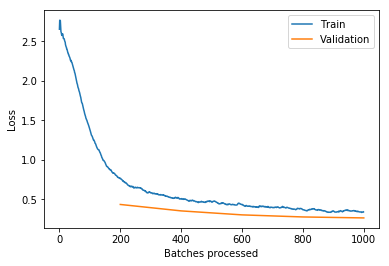

In [32]:
learn.recorder.plot_losses()

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

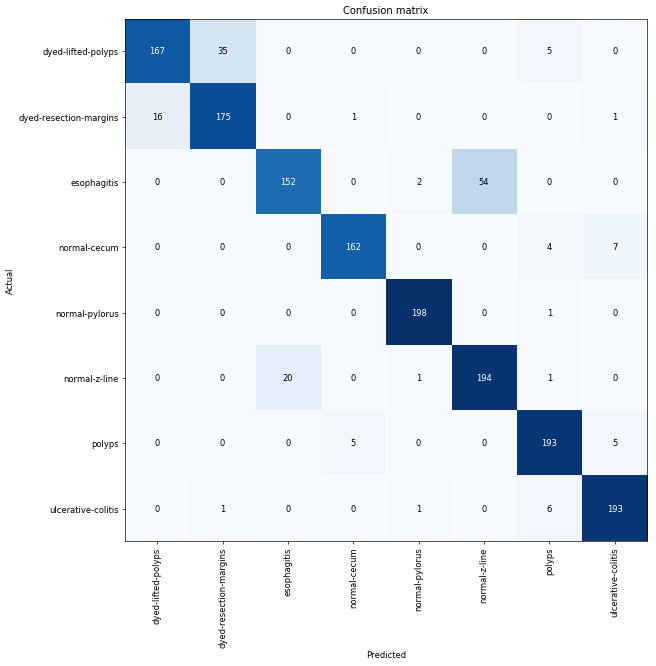

In [33]:
interp.plot_confusion_matrix(figsize=(12, 11), dpi=60)

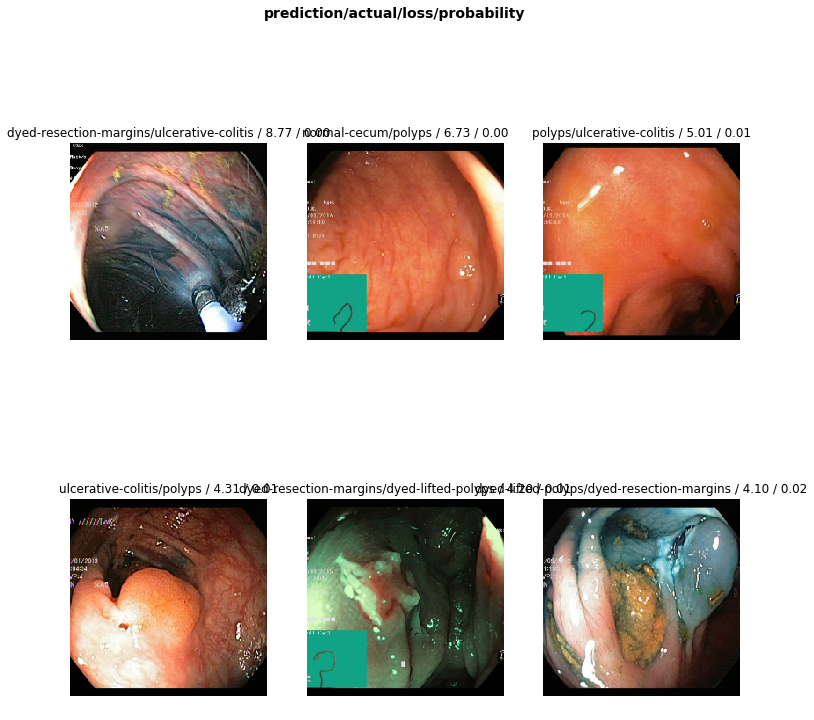

In [34]:
interp.plot_top_losses(6)

## Fine tuning the model

In [0]:
learn.load("stage-1")

In [0]:
learn.unfreeze()

In [38]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


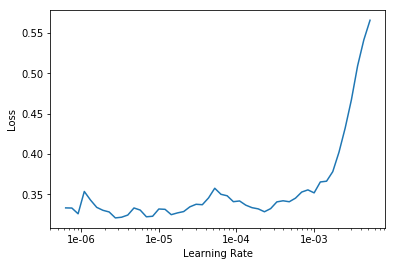

In [40]:
learn.recorder.plot()

In [41]:
learn.fit_one_cycle(5, max_lr=slice(7e-5, 3e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.333610,0.305152,0.886875,05:20
1,0.321676,0.249262,0.901875,05:07
2,0.280877,0.198315,0.919375,04:55
3,0.200752,0.175985,0.931875,04:55
4,0.182977,0.154137,0.938750,05:02


In [0]:
learn.freeze()

In [0]:
learn.save("stage-2")

## Evaluating fine tuned model

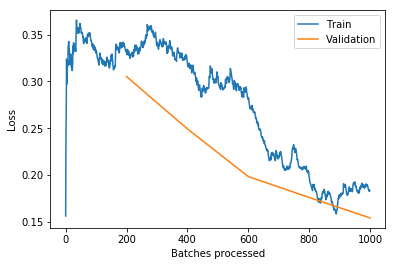

In [51]:
learn.recorder.plot_losses()

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

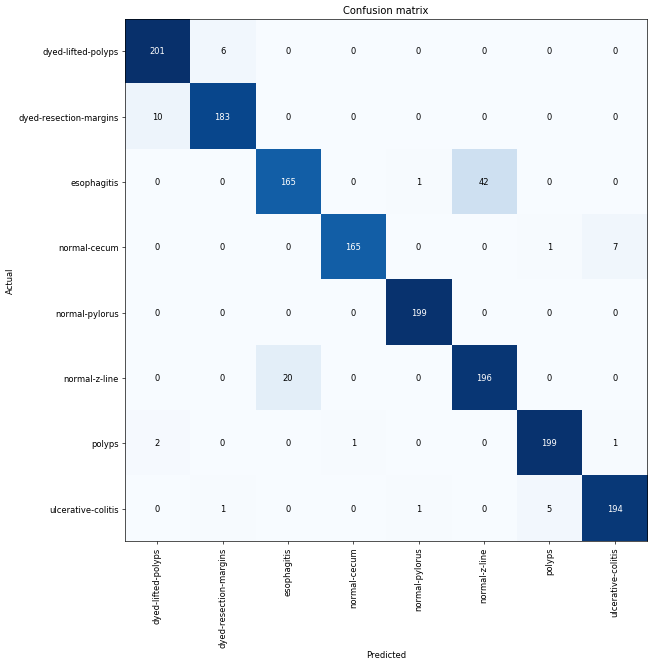

In [48]:
interp.plot_confusion_matrix(figsize=(12, 11), dpi=60)

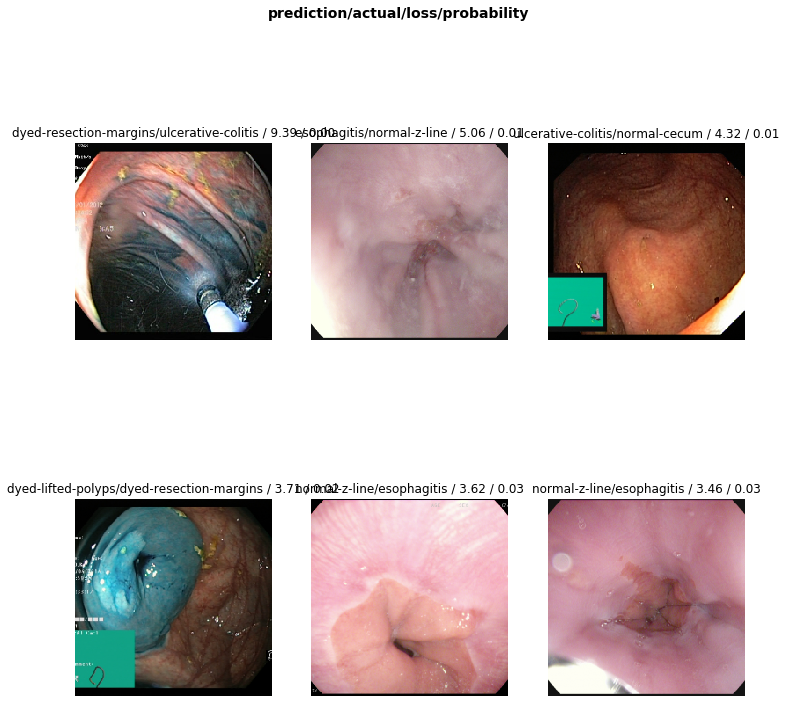

In [49]:
interp.plot_top_losses(6)

## Retraining the model

In [0]:
learn.load("stage-2")

In [54]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


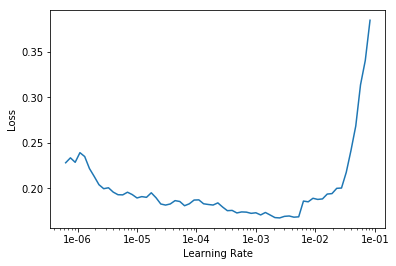

In [55]:
learn.recorder.plot()

In [56]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.167006,0.150366,0.940000,05:01
1,0.174139,0.145145,0.939375,05:03
2,0.150505,0.140835,0.941875,04:58
3,0.179356,0.141489,0.945000,05:06
4,0.155056,0.138242,0.946250,05:06


In [0]:
learn.save("model-3")

## Validating retrained model

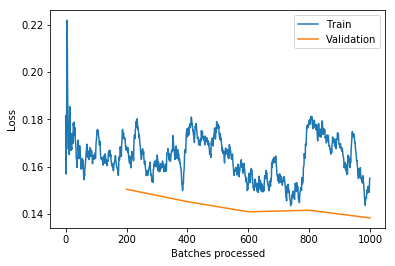

In [58]:
learn.recorder.plot_losses()

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

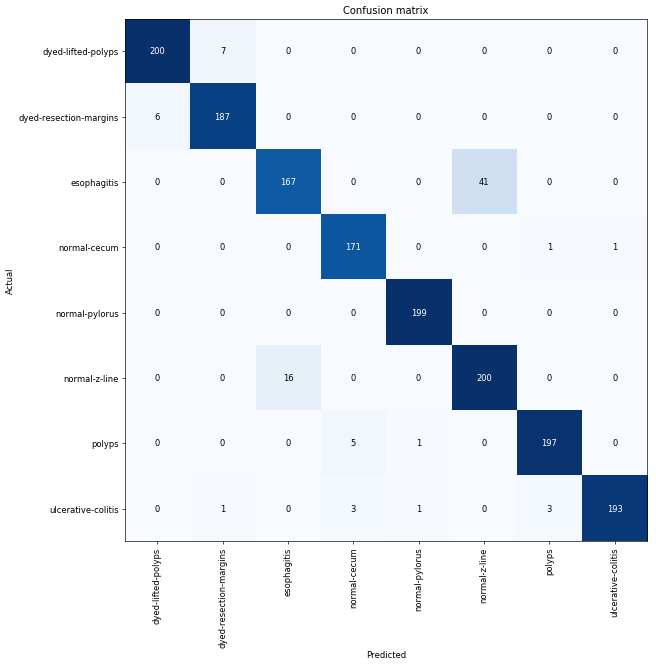

In [60]:
interp.plot_confusion_matrix(figsize=(12, 11), dpi=60)

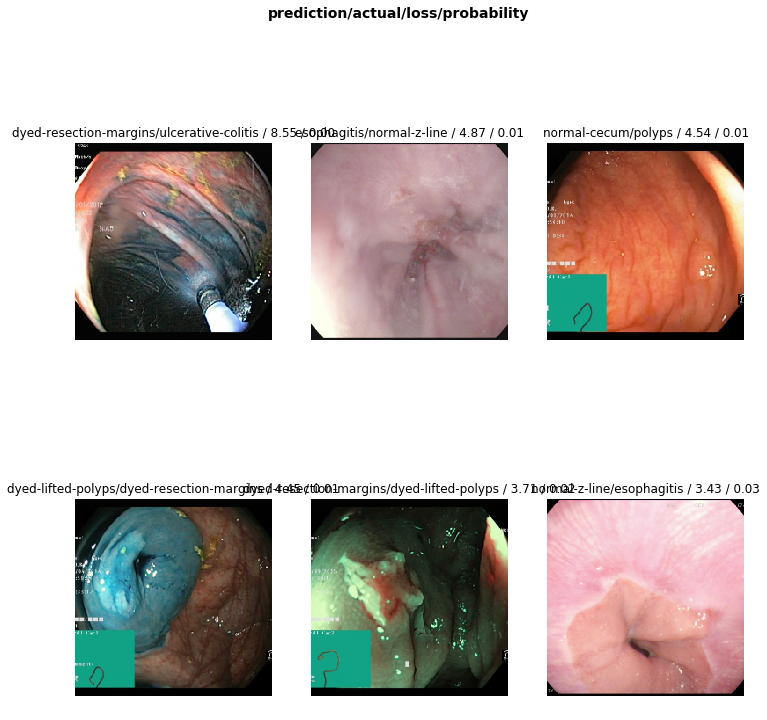

In [61]:
interp.plot_top_losses(6)